# 自然語言處理
* STEP 1：[資料清整](http://localhost:8888/notebooks/Python%20Learning/nomura_fintech_nlp_analysis.ipynb#%E5%8C%AF%E5%85%A5%E5%A5%97%E4%BB%B6)
* STEP 2：[斷詞處理](http://localhost:8888/notebooks/Python%20Learning/nomura_fintech_nlp_analysis.ipynb#%E6%96%B7%E8%A9%9E%E8%99%95%E7%90%86)
* STEP 3：[詞頻計算](http://localhost:8888/notebooks/Python%20Learning/nomura_fintech_nlp_analysis.ipynb#%E8%A9%9E%E9%A0%BB%E8%A8%88%E7%AE%97)
* STEP 4：[稀疏矩陣](http://localhost:8888/notebooks/Python%20Learning/nomura_fintech_nlp_analysis.ipynb#%E7%A8%80%E7%96%8F%E7%9F%A9%E9%99%A3)
* STEP 5：[共現性矩陣](http://localhost:8888/notebooks/Python%20Learning/nomura_fintech_nlp_analysis.ipynb#%E5%85%B1%E7%8F%BE%E6%80%A7%E7%9F%A9%E9%99%A3)
* STEP 6：[資料正則化](http://localhost:8888/notebooks/Python%20Learning/nomura_fintech_nlp_analysis.ipynb#%E5%85%B1%E7%8F%BE%E6%80%A7%E7%9F%A9%E9%99%A3)
* STEP 7：[視覺化網絡圖](http://localhost:8888/notebooks/Python%20Learning/nomura_fintech_nlp_analysis.ipynb#%E8%A6%96%E8%A6%BA%E5%8C%96%E7%B6%B2%E7%B5%A1%E5%9C%96)
* STEP 8：[關鍵字間的關係](http://localhost:8888/notebooks/Python%20Learning/nomura_fintech_nlp_analysis.ipynb#%E9%97%9C%E9%8D%B5%E5%AD%97%E9%96%93%E7%9A%84%E9%97%9C%E4%BF%82)

# 作業主題：全球華爾街日報中之標題解析
# 資料來源 ： 華爾街日報（爬蟲）
# 資料時間軸 ：2020年 1月 ~ 2020年 3月

## 匯入套件

In [ ]:
import nltk
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
import networkx as nx

## 匯入資料

In [ ]:
df_ori = pd.read_csv(r'C:\Users\sefx5\Desktop\WSJ_90d_data.csv',encoding = 'utf8')

## 顯示基本資料

In [ ]:
df_ori.shape

In [ ]:
df_ori.head()

## 資料清整

In [ ]:
# 將無效報導分類
df_ori['title'] = df_ori['title'].apply(lambda title: 0 if detect(str(title))!="en" else title)

In [ ]:
# 顯示有無效資料筆數
print('在標簽中的遺失值筆數為： ')
df_ori['sub_title'].isnull().value_counts()

In [ ]:
# 抽出無效報導的 index 並刪除
drop_title_index = df_ori[df_ori['title'] == 0].index
df_ori = df_ori.drop(drop_title_index,axis = 0)
print('無效報導筆數為 ：' + str(len(drop_title_index)))

In [ ]:
# 抽出無效標簽的 index 並刪除
drop_label_index = df_ori[df_ori['sub_title'].isnull() == True].index
df_ori = df_ori.drop(drop_label_index,axis = 0)
print('無標簽報導為 ：' +str(len(drop_label_index)))

In [ ]:
# 重設 index
df_ori = df_ori.reset_index(drop = True)
print(df_ori.shape)
df_ori.head()

## 斷詞處理

In [ ]:
# 下載並使用 spaCy 斷字資料庫（語料庫）
nlp = spacy.load('en_core_web_sm')
spacy_stopwords = list(spacy.lang.en.stop_words.STOP_WORDS)
symbols   = ['.', ',', '’','“','”','"', "''" ,"'",'*','``', '**','$','%','&','#','-','--',"''",'""','?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"'s","'m","n't"]
rubbish_list = ['s', 't', 'ok', '‘', 'go', '4', 'tv', 'pg', 'e', 'k', '2', 'de', 'hp', 'eu', 'd', 'xl', 'o', 'er', 'ai', 'gm', '1', '23', 'ev', 've', '22', 'hq', 'dy', '86', 'cv', '98', 'bp', '15', 'l', 'p', '5', 'la', '40', '25', '14', 'sl', 'ge', '91', '11', '81', 'm', 'll', '24', '3m', '3', 'ad', '41', '35', '10', '50', '18', 'oh', '55', '77', '7', '60', '90', '17', 'us', 'y', '30', 'vw', 'ep', '20', 'pi', 'r', '16', '32', '46', '€1', 'mb', 'ha', '29', 'xi', 'ii', 'os', '93', 'uk', '6', 'a.', 'jp', '5g', '78', '37', 'v.', 'c.', '84', '75', 'j.', 'ko', '38', 'va', '19', 'ho', 'ap', 'iq', '36', 'pc', 'dp', 'ut', 'j', '`', '34', '45', 'al', 'p.', '70', 'le', '8', '12', 'lp', 'id', 'jr', '9', 'n', 'm.', 'z', 'rb', '21', 'gi', 'em', 'be', 'v', 'cj', 'fc', 'au', 'el', 'ab', '13', 'ya', '28', 'ww', 'ar', '82', '0', 'h', 'h.', '33', 's.', '5½', 'pb', '85', 'g', '26', '92', 'b', 'g.', 'mo', 'jv', '—', '80', '56', 'vr', 'rh', 'na', 'kb', 'un', '79', '83', '27']
spacy_stopwords.extend(symbols+rubbish_list)
print('spaCy 語料庫擁有 {} 的斷字'.format(len(spacy_stopwords)))
print('前 5 個斷字為 {}'.format(spacy_stopwords[:5]))

In [ ]:
# 將 Stop Words List 中出現的字眼去除並把内容寫入進的 column（title_edited）
def wsj_filter(text, stopword_list):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word.lower(),pos = 'n') for word in word_tokenize(str(text).lower()) if word not in stopword_list]

df_ori['title_edited'] = df_ori['title'].apply(lambda text: wsj_filter(text,spacy_stopwords))
df_ori['label_edited'] = df_ori['sub_title'].apply(lambda text: wsj_filter(text,spacy_stopwords))
df_ori['content_edited'] = df_ori['content'].apply(lambda text: wsj_filter(text,spacy_stopwords))

## 詞頻計算

In [ ]:
# 截取及計算關鍵字，並轉成 data frame 進行條件篩選
keywords_collection = sum(list(df_ori['title_edited']), [])
each_words_count = nltk.FreqDist(keywords_collection)
df_label_keyword = pd.DataFrame.from_dict(each_words_count, orient='index',columns = ['count']).sort_values(['count'], ascending = False).reset_index().rename(columns = {'index' : 'keyword'})
# df_label_keyword = df_label_keyword[df_label_keyword['count'] > sum(df_label_keyword['count']) / df_label_keyword.shape[0]]
df_label_keyword = df_label_keyword[:21]
print('執行第二遍后所篩選出的關鍵子與頻數：')
df_label_keyword.head()
### 只需在第一次執行，接著觀察無意義關鍵字並把列表加入 stopwords list 中，
### 再執行去除動作
# rubbish_keyword = []
# for word in keywords_collection:
#     if len(word) < 3:
#         rubbish_keyword.append(word)
# rubbish_keyword = list(dict.fromkeys(rubbish_keyword))

## 稀疏矩陣

In [ ]:
# 建立一個關鍵字計算器，並導入到 df_ori['title_matrix'] 中
def keyword_classification(list_):
    output = []
    for keyword in list(df_label_keyword['keyword']):
        if keyword in list_:
            count = 0
            for word in list_:
                if word == keyword:
                    count+=1
            output.append(count)
            continue
        output.append(0)
    return output
                      
df_ori['title_matrix'] = df_ori['title_edited'].apply(keyword_classification)

In [ ]:
# 將 matrix 與 keyword 列表建立一個稀疏矩陣
df_cooc_matrix = pd.DataFrame(list(df_ori['title_matrix']),columns = list(df_label_keyword['keyword'])).reset_index(drop = True)
# df_cooc_matrix['index'] = df_cooc_matrix['index'].apply(lambda index: df_ori['title_edited'][index])
df_cooc_matrix.head()

In [ ]:
# 畫熱點圖驗證關鍵字的分佈情況
plt.figure(figsize=(24,24))
sn.heatmap(df_cooc_matrix,vmin = 0,vmax = 3,cmap='Reds')
plt.show()

## 共現性矩陣

In [ ]:
# 計算共現性矩陣（轉置矩陣，矩陣相乘）
df_co = df_cooc_matrix.transpose()
co_mtx = df_co.dot(df_cooc_matrix)
co_mtx.head()

## 資料正則化

In [ ]:
co_mtx_probability = np.divide(co_mtx,df_label_keyword['count'])
co_mtx_probability

In [ ]:
plt.figure(figsize=(24,24))
sn.heatmap(co_mtx_probability,vmin = 0,vmax = 1,cmap='Blues')
plt.show()

## 視覺化網絡圖

In [ ]:
# 將内容轉換成 Graph 接受的形式
high_cor_list = []
for col_index in co_mtx_probability.columns:
    for row_index in co_mtx_probability.columns:
        if co_mtx[col_index][row_index] > 0:
            high_cor_list.append((col_index,row_index,co_mtx.loc[col_index][row_index]))

In [ ]:
# 初始化無向圖，並將關鍵字與權重新增到 Graph 中
G_title = nx.Graph()
G_title.add_weighted_edges_from(high_cor_list)

In [ ]:
# 繪製關鍵字之網路圖
plt.figure(figsize=(24,24))
pos = nx.spring_layout(G_title)
nx.draw(G_title,pos,node_size = [val*1000 for (node, val) in G_title.degree()],node_color = '#FFE162')
nx.draw_networkx_labels(G_title, pos, font_size = 30,alpha = 1)
nx.draw_networkx_edges(G_title, pos, edge_color = '#DDDDDD', alpha = 1)
plt.show()

In [ ]:
# 列出所有關鍵字的度
for keyword,val in G_title.degree():
    print(keyword + ' : ' + str(val) + ' Degree')

## 關鍵字間的關係

#### 從這份簡易分析中可以瞭解到在近三個月中，因爲武漢肺炎的傳播，導致關鍵字（Coronavirus）成爲本次關鍵字中的中心節點，因此，在對應到野村專題中的債卷市場中，雖然沒有以時間序列的切入分析，但兩者之間存在高相關，因爲過程中一旦關鍵字（fed / trump / china）的出現，都會導致債卷市場出明顯波動效應。

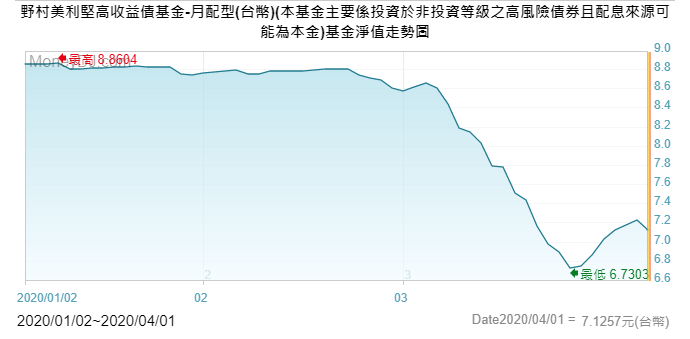



In [ ]:
main_keyword = ['china','fed','trump']

def keyword_match(list_):
    for word in list_:
        if word in main_keyword:
            return 1
        else:
            return 0

df_ori['status'] = df_ori['title_edited'].apply(keyword_match)
list(df_ori[df_ori['status'] == 1]['date'].unique())